# 1.데이터 소개


## 1-1.컬럼 설명
  * **department** - 부서
  * **region** - 근무 지역
  * **education** - 학력
  * **gender** - 성별
  * **recruitment_channel** - 어떤 루트를 통해서 채용을 했는지?
    * sourcing : 소싱
    * referred : 추천
    * other : 기타 방식
  * **no_of_trainings** - 몇번 트레이닝을 받았는지?
  * **age** - 나이
  * **previous_year_rating** - 작년고과점수
  * **length_of_service** - 근속연수
  * **awards_won?** - 회사 내 수상한 이력이 있는지?
  * **avg_training_score** - 평균 트레이닝 점수
  * **is_promoted** - 승진 여부

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import plotly.io as pio

pio.renderers.default = "svg"

## 1-2. 탐색적(EDA) 분석

In [3]:
hr_df = pd.read_csv('/content/hr.csv')

In [4]:
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
hr_df['length_of_service'].value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

*

In [6]:
#'employee_id'는 우리의 주민등록번호처럼 임의로 부여된 숫자로 삭제하는 게 좋음.
#   (포함을 시킨채로 학습하면 오히려 안좋은 영향을 끼칠 수 있음.)

hr_df.drop('employee_id',axis=1,inplace=True)

In [7]:
hr_df.info()

# 중간에 Nan값들이 보임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [8]:
hr_df.describe(include='all')

# 8.5%가 승진을 한것을 알 수 있다.

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000


In [9]:
hr_df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

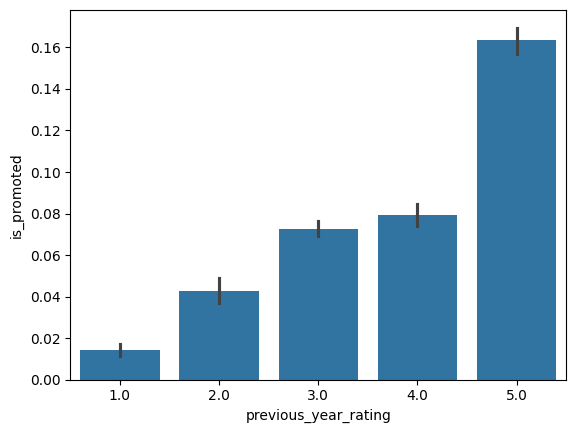

In [10]:
sns.barplot(x='previous_year_rating', y='is_promoted',data=hr_df)

<ipython-input-11-285a5c7e6de0>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




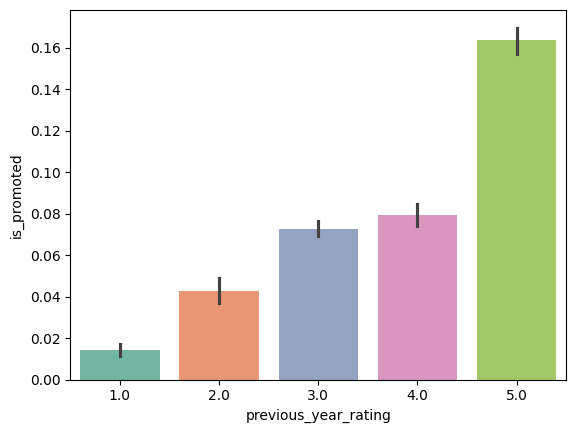

In [11]:
sns.barplot(x=hr_df['previous_year_rating'], y=hr_df['is_promoted'],palette='Set2')
plt.show()

<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

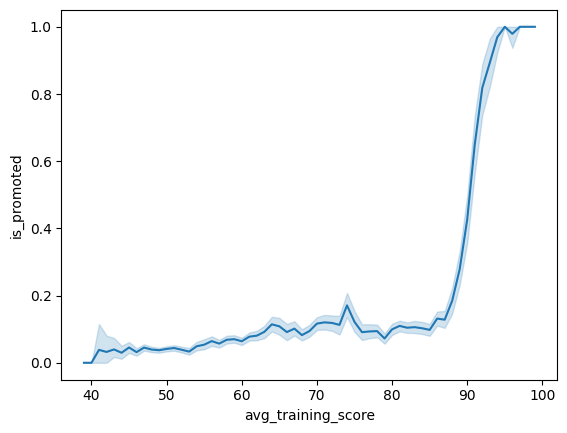

In [12]:
sns.lineplot(x=hr_df['avg_training_score'], y=hr_df['is_promoted'])

<ipython-input-13-37af2f7192e6>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

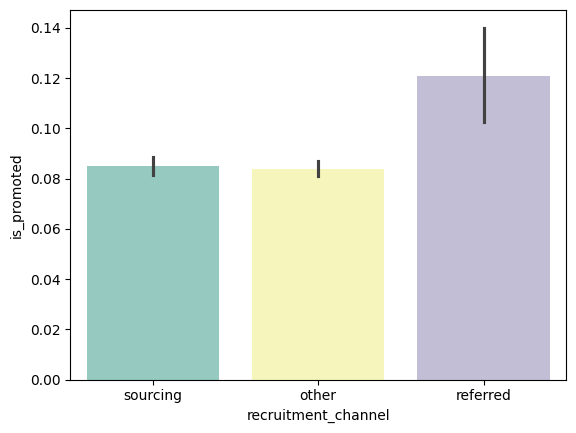

In [13]:
sns.barplot(x='recruitment_channel', y='is_promoted', data=hr_df, palette = 'Set3')

#referred 막대의 오차 범위가 크게 잡히는 이유는 여기에 해당하는 데이터가 많지 않아서 확률적인 확신이 들지 않을 때 길게 잡힘.

In [14]:
hr_df['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='is_promoted'>

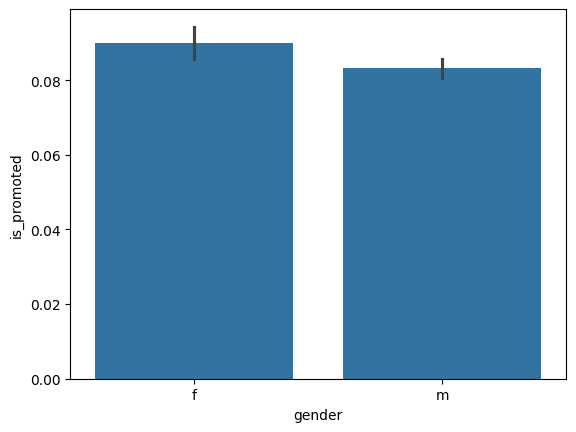

In [15]:
sns.barplot(x='gender',y='is_promoted',data=hr_df)

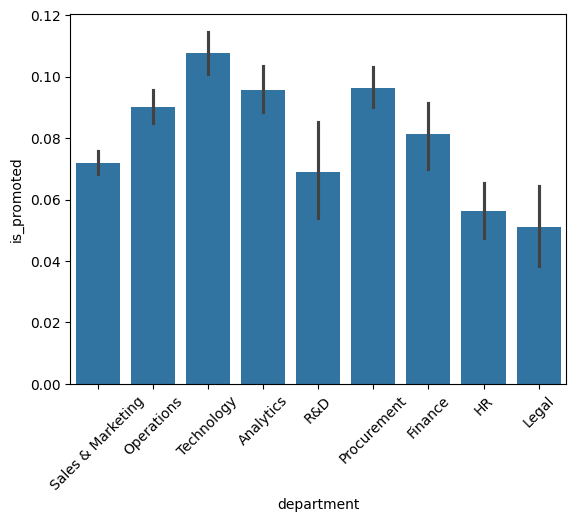

In [16]:
sns.barplot(x='department',y='is_promoted',data=hr_df)
plt.xticks(rotation=45)
plt.show()

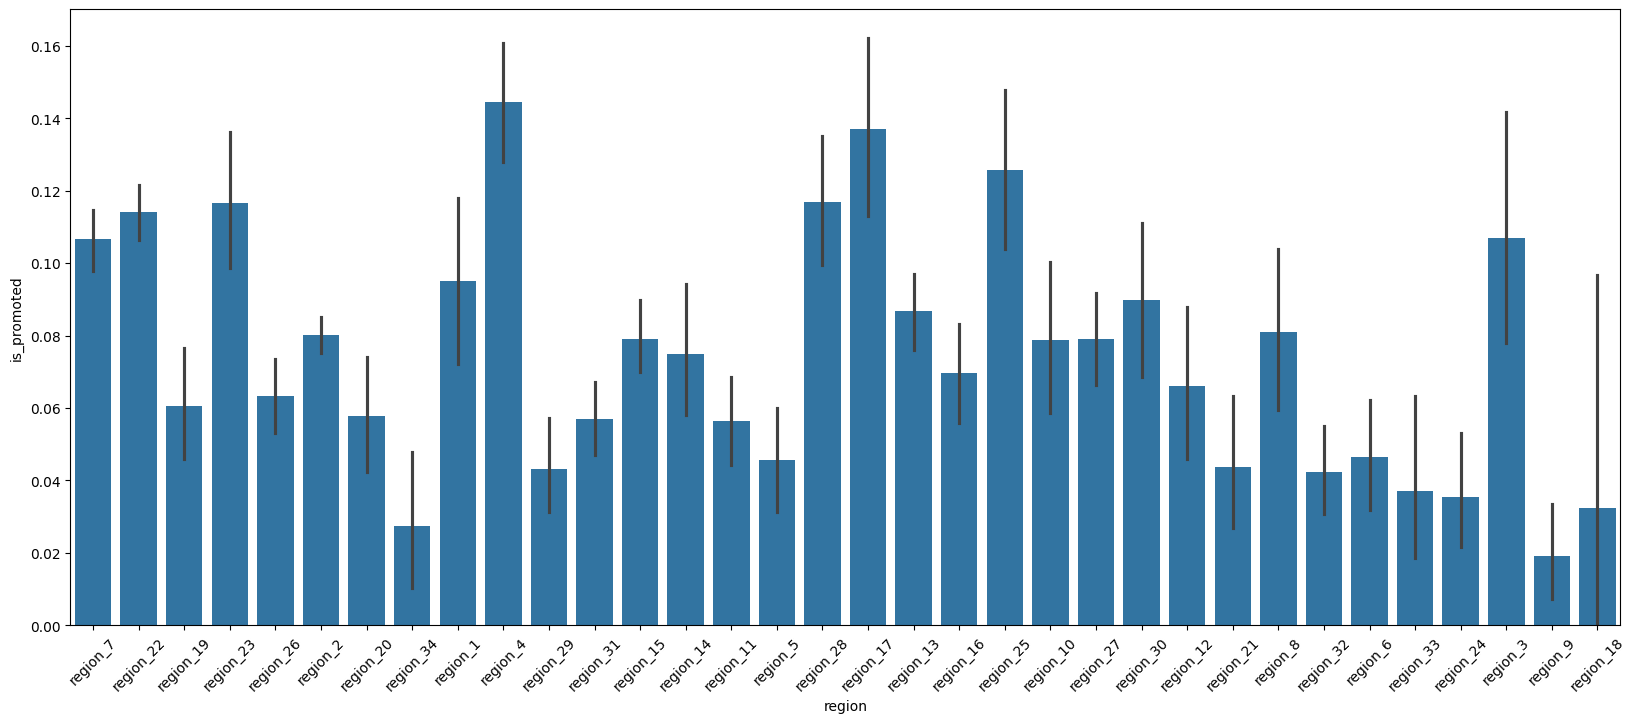

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(x='region',y='is_promoted',data=hr_df)
plt.xticks(rotation=45)
plt.show()

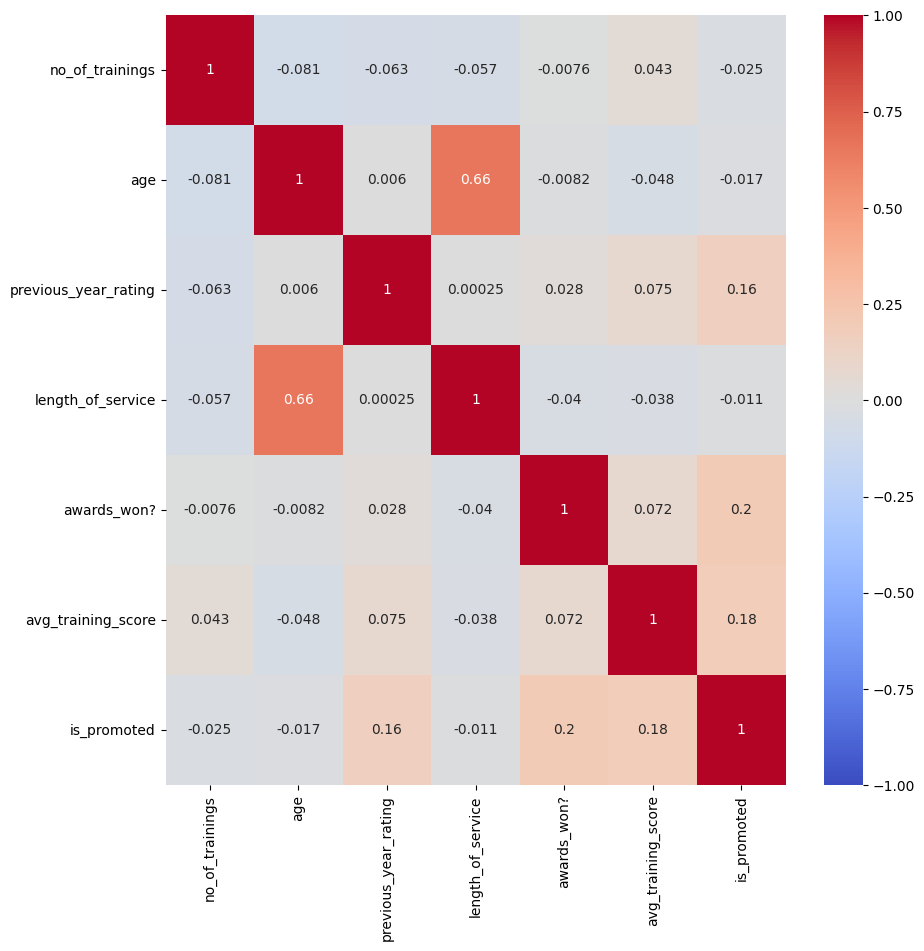

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(hr_df.select_dtypes(exclude = 'object').corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.show()

## 1-3. 결측치 처리

In [19]:
hr_df.isna().mean()

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [20]:
hr_df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [21]:
hr_df['education'] = hr_df['education'].fillna('unknown')

In [22]:
hr_df['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [23]:
len(hr_df)

54808

In [24]:
hr_df = hr_df.dropna()

In [25]:
hr_df_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==1)]
hr_df_no_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==0)]

# 2.데이터 분석

## 2-1.문제 정의
직원들의 승진여부가 대체적으로 어떻게 되는지 알고 싶어요.

## 배경과 목적을 고려하여 새로 정의한 문제정의의 예
소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들의 승진여부가 대체적으로 어떻게 되는지 알고 싶어요.

## 분석을 위해 새로 정의한 문제정의의 예
소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들 중 승진이 된 직원과 승진이 되지 않은 직원의 차이는 무엇인가요?

## 2-2. 가설 설정
문제 정의에 기반하여 선정한 가설들이다.

문제 정의에 제시된 조건 : (recruitment_channel = 'sourcing', no_of_trainings >= 80 )


* 문제 정의에 제시된 조건을 만족한 직원 中 승진율은 남성이 더 많을 것이다.
* 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 석사가 월등히 많을 것이다.
* 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 모두 근속연수가 3년 이상일 것이다.
* 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 특정 근무지역에 편향되어 있을 것이다.
* 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원 대비 전체직원 비율은 연령대에 비례할 것이다.
* 수상 이력이 있는 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.
* 작년 고과점수가 4점 이상인 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.


## ※ 가설 우선순위 정하기

**이걸 왜 해야 하는가?**

한정된 시간 내에 분석을 해내야 한다. 그런데 검증해야 할 가설이 무수히 많으면 목표했던 기간 내에 이걸 다 검증하고 분석을 끝낼 수 있을까??

-> 우선순위가 높은 가설들을 먼저 검증해가는 것이 좋다.

**우선 순위를 정하기 위한 프레임워크 I.C.E**

**Impact** : 검증했을 때 임펙트 효과가 큰가?

**Confidence** : 조금 더 확신이 가는 가설인가?

**Ease** : 검증까지의 난이도가 쉬운가? 즉, 걸리는 시간이 짧은가?


## ** I.C.E. 를 통해 최종 검증할 가설 List**
1. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 석사가 월등히 많을 것이다.
2. 문제 정의에 제시된 조건을 만족한 직원 中 승진율은 남성이 더 많을 것이다.
3. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원 대비 전체직원 비율은 연령대에 비례할 것이다.
4. 수상 이력이 있는 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.
5. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 모두 근속연수가 3년 이상일 것이다.
6. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 특정 근무지역에 편향되어 있을 것이다.
7. 작년 고과점수가 4점 이상인 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.





## 2-3. 실험 설계
가설을 어떻게 검증할 것인가?

제일 먼저 고려할 사항은 **'꼭 쿼리나 코딩을 통해 검증해야 하는가?'** 이다

검증의 방법은 아래와 같이 다양하기 때문이다.

* DB & SQL : 정확도가 중요한 정보  ( 예 : 사용자 정보, 구매 기록, 결제 정보 등 )
* Amplitude, Mixpanel, GA : 다양한 행동 데이터 ( 예 : 클릭, 페이지 랜딩, 콘텐츠 조회, 단순 정보 입력, 열기/ 닫기 )
* GA : 이 외의 마케팅 정보 ( 예 : 유입 경로 )
* Excel, 구글 스프레드 시트 ( 예 : 차트, 통계 분석 등 )
* 그 외 전화/이메일 조사, 설문/인터뷰, UX 분석 도구 등


## 2-4.가설 검정

**가설 1. 소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들 중 승진이 된 직원은 석사가 월등히 많을 것이다.**



In [26]:
hr_df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0


In [27]:
hr_df_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==1)]
hr_df_no_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==0)]

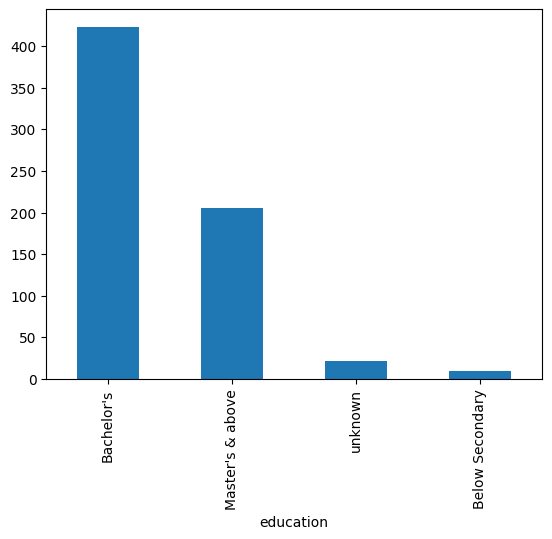

In [28]:
hr_df_promoted['education'].value_counts().plot(kind='bar')
plt.show()

*** 가설 검정**

가설 1 검증 결과 석사보다 학사가 월등히 많으므로, 거짓임을 알 수 있다.
즉 석사라고 무조건 학사보다 승진에 유리한 것은 아님을 확인하였다.

----------------------------------------------------------------------

**가설 2. 문제 정의에 제시된 조건을 만족한 직원 中 승진율은 남성이 더 많을 것이다.**


<Axes: xlabel='gender'>

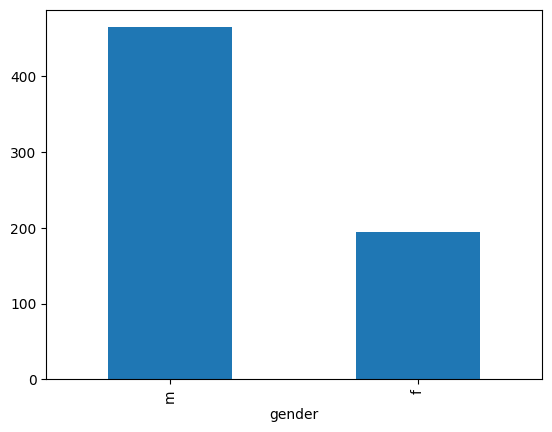

In [29]:
#승진한 직원의 수를 먼저 비교해보자!
hr_df_promoted['gender'].value_counts().plot(kind='bar')

승진한 직원의 수는 남성이 월등히 많지만 애초에 남성과 여성의 전체 직원 수가 다를 수도 있다. 따라서 승진율로 비교해보는 것이 좋다.

In [30]:
# 남성의 승진율
hr_df_promoted['gender'].value_counts()[0] / hr_df['gender'].value_counts()[0]

0.013087531663383056

In [31]:
# 여성의 승진율
hr_df_promoted['gender'].value_counts()[1] / hr_df['gender'].value_counts()[1]

0.01286788966609476

남성은 1.30%, 여성은 1.28%로 별 차이가 없다.
번외로, 남성과 여성의 부서별 승진율을 비교해보자.

<Axes: xlabel='gender,department'>

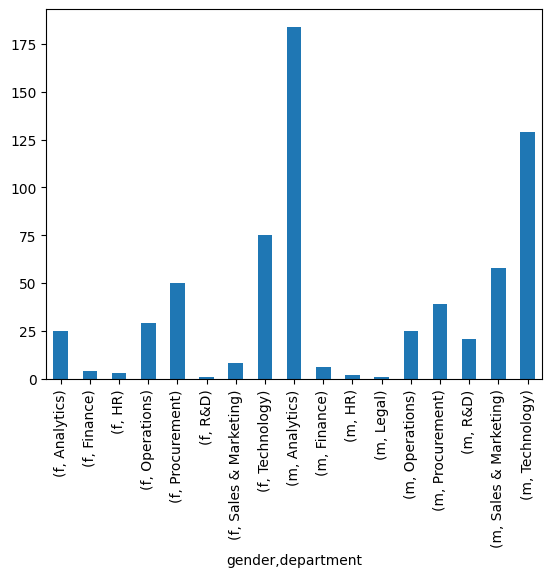

In [32]:
hr_df_promoted2 = hr_df_promoted.groupby(['gender','department']).count()['region'].plot(kind='bar')
hr_df_promoted2

In [38]:
#pip install -U kaleido

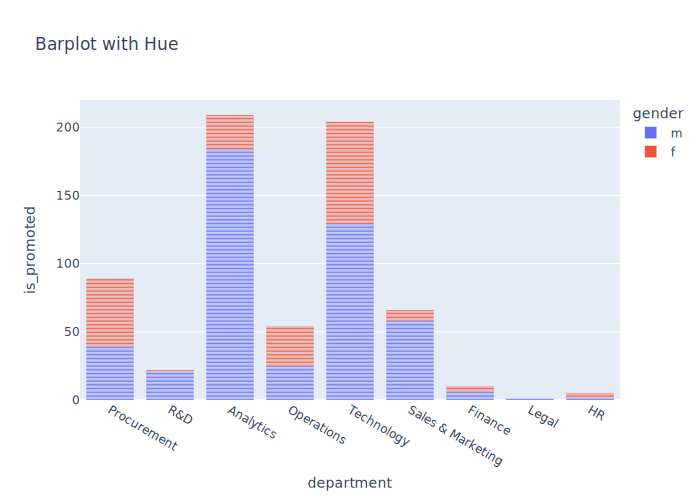

In [64]:
# 막대 그래프 그리기 (hue를 추가하여 색조 부여)
fig = px.bar(hr_df_promoted, x='department', y='is_promoted', color='gender', title='Barplot with Hue')

# 그래프 보이기
fig.show()

특정 부서(Analytics, Technology)에서 남성의 승진한 직원 수가 월등히 높은 것을 알 수 있다.

*** 가설 검정**

가설2 남성(m)과 여성(f)의 승진율보다 근소하게 높다. 이 차이만으로 남성의 승진율이 높다고 할 수 있을까? 확연한 차이가 아니기 때문에 가설2는 거짓이다.

----------------------------------------------------------------------

**가설3. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원 대비 전체직원 비율은 연령대에 비례할 것이다.**

In [44]:
#연령대 컬럼 만들기
hr_df['age_group'] = (hr_df['age'] // 10) * 10

In [45]:
hr_df_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==1)]
hr_df_no_promoted = hr_df.loc[(hr_df['recruitment_channel']=='sourcing')&(hr_df['avg_training_score']>=80)&(hr_df['is_promoted']==0)]

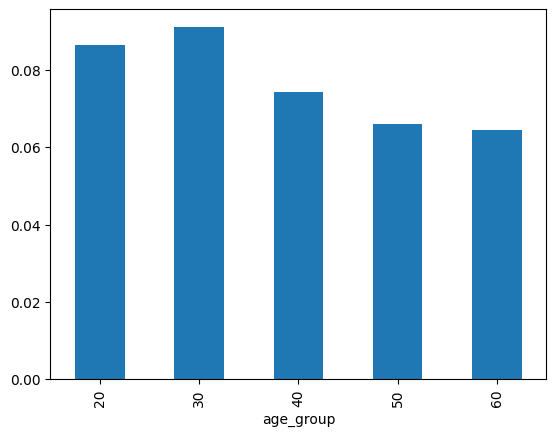

In [46]:
hr_df.groupby('age_group')['is_promoted'].mean().plot(kind='bar')
plt.show()

*** 가설 검정**

가설3 오히려 2030 연령대의 승진율이 높다. 연령대가 높고 직책이 높을수록 승진이 어렵다는 안타까운 현실을 보여주고 있다. 따라서 이는 거짓이다.

----------------------------------------------------------------------

**가설4. 수상 이력이 있는 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.**

In [47]:
hr_df_promoted['awards_won?'].value_counts()

awards_won?
0    532
1    128
Name: count, dtype: int64

In [48]:
hr_df_no_promoted['awards_won?'].value_counts()

awards_won?
0    3345
1      35
Name: count, dtype: int64

*** 가설 검정**

가설4 승진이 안된 직원들 중에도 수상이력이 있는 사람들이 있으므로, 수상 이력이 반드시 승진을 보장해주지 않는다는 것을 알 수 있다. 따라서, 이는 거짓이다.

----------------------------------------------------------------------

**가설 5. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 모두 근속연수가 3년 이상일 것이다.**

In [49]:
# 가설5가 참이 되려면 이 코드에서 데이터가 조회되면 안된다.
# 승진이 된 직원 중 근속연수가 3년 미만인 직원이 102명 조회된다.
hr_df_promoted[hr_df_promoted['length_of_service']<3]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_group
536,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,96,1,30
1016,Analytics,region_7,Bachelor's,m,sourcing,2,29,5.0,2,0,86,1,20
1354,R&D,region_26,Bachelor's,m,sourcing,2,40,3.0,2,1,84,1,40
1518,Technology,region_2,Bachelor's,f,sourcing,1,24,4.0,2,0,84,1,20
2132,Analytics,region_27,Bachelor's,m,sourcing,1,29,4.0,1,0,81,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53863,Analytics,region_27,Bachelor's,m,sourcing,1,27,5.0,2,0,82,1,20
54151,Technology,region_26,Bachelor's,m,sourcing,1,26,4.0,2,0,80,1,20
54385,Sales & Marketing,region_10,Master's & above,m,sourcing,1,36,5.0,2,0,94,1,30
54533,Analytics,region_25,Bachelor's,m,sourcing,2,32,5.0,2,0,87,1,30


*** 가설 검정**

가설5. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 모두 근속연수가 3년 이상일 것이다.는 거짓이다.

----------------------------------------------------------------------

**가설6. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 특정 근무지역에 편향되어 있을 것이다.**


In [56]:
hr_df_promoted_region = pd.DataFrame(hr_df_promoted['region'].value_counts())
hr_df_promoted_region = hr_df_promoted_region.reset_index(names='number')

In [57]:
hr_df_region = pd.DataFrame(hr_df['region'].value_counts())
hr_df_region = hr_df_region.reset_index(names='number')

In [58]:
hr_df_region_merge = pd.merge(hr_df_promoted_region, hr_df_region, how='left', on = 'number')
hr_df_region_merge['region_rate'] = hr_df_region_merge['count_x']/hr_df_region_merge['count_y']
hr_df_region_merge

,number,count_x,count_y,region_rate
0,region_22,131,5684,0.023047
1,region_2,125,11535,0.010837
2,region_7,79,4585,0.017230
3,region_28,27,1219,0.022149
4,region_4,25,1628,0.015356
5,region_13,25,2510,0.009960
6,region_15,24,2690,0.008922
7,region_23,22,1130,0.019469
8,region_16,19,1354,0.014032
9,region_25,18,752,0.023936


In [59]:
hr_df_region_merge = hr_df_region_merge.sort_values('region_rate',ascending=False)

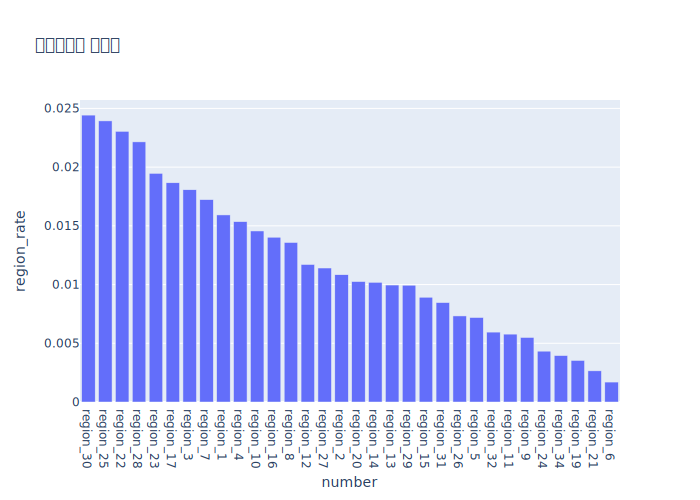

In [60]:
import plotly.express as px

# 막대 그래프 그리기
fig = px.bar(hr_df_region_merge, x='number', y='region_rate', title='근무지역별 승진율')

# 그래프 보이기
fig.show()

*** 가설 검정**

가설6. 근무지역마다 직원의 수 자체가 큰 차이를 보이기 때문에 승진한 직원의 수가 아닌 승진율을 통해 비교한 결과이다. 위의 그래프를 보면 알겠지만 지역마다 승진율이 균등하지 않고 차이가 두드러지게 나타난다.


따라서, 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 특정 근무지역에 편향되어 있을 것이다.는 참이다.

----------------------------------------------------------------------

**가설7. 작년 고과점수가 4점 이상인 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.**

In [61]:
hr_df_promoted[hr_df_promoted['previous_year_rating']<4]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_group
705,Analytics,region_22,Bachelor's,f,sourcing,2,27,3.0,3,0,85,1,20
1268,Analytics,region_5,Master's & above,m,sourcing,1,37,2.0,7,1,81,1,30
1354,R&D,region_26,Bachelor's,m,sourcing,2,40,3.0,2,1,84,1,40
1854,R&D,region_2,Master's & above,m,sourcing,1,41,3.0,13,0,85,1,40
2389,Technology,region_17,Bachelor's,m,sourcing,1,30,3.0,6,0,81,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53721,R&D,region_4,Master's & above,m,sourcing,1,34,3.0,4,1,85,1,30
54011,Analytics,region_2,Master's & above,m,sourcing,1,43,3.0,18,0,87,1,40
54455,Sales & Marketing,region_16,Bachelor's,m,sourcing,1,33,3.0,7,0,96,1,30
54579,Technology,region_17,Master's & above,m,sourcing,1,42,3.0,12,0,80,1,40


In [62]:
hr_df_promoted[hr_df_promoted['previous_year_rating']<4]['previous_year_rating'].value_counts()

previous_year_rating
3.0    174
2.0     26
1.0     15
Name: count, dtype: int64

*** 가설 검정**

작년고과점수가 4점 미만인 직원들도 승진된 직원 수가 많이 있는 것을 확인하였고, 심지어 최저점인 1점이었던 직원 중에도 승진이 된 직원들이 있었다. 따라서

가설7. 작년 고과점수가 4점 이상인 직원은 모두 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원에 포함되어 있을 것이다.는 거짓이다.

----------------------------------------------------------------------

## 2-5.가설 검정 결과 정리

**소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들 중 승진이 된 직원과 승진이 되지 않은 직원의 차이는 무엇인가요?**

가설 1. 소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들 중 승진이 된 직원은 석사 유무와는 관계가 없다.

가설2 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 남성이 더 많다.
참
가설3. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원 대비 전체직원 비율은 연령대에 비례하지 않고 2030의 비중이 높다.

가설4. 수상 이력이 있는 직원으로 모두 문제 정의에 제시된 조건을 만족한 직원이라고 해서 승진이 되는 것은 아니다.

가설 5. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 모두 근속연수가 3년 이상인 것은 아니다.

가설6. 문제 정의에 제시된 조건을 만족한 직원 中 승진이 된 직원은 특정 근무지역에 편향되어 있다.
참
가설7. 작년 고과점수가 높다고 해서 승진에 유리한 것은 아니다.

----------------------------------------------------------------------


# 3.결론

소싱(sourcing) 루트를 통해 채용이 된 평균 트레이닝 점수가 80점을 이상인 직원들 중 승진이 된 직원과 승진이 되지 않은 직원의 차이는 연령대, 근무지역에 다른 요소들에 비해 큰 영향을 받는 것으로 나타났다.

반면, 석사 유무, 수상 이력, 근속연수, 작년 고과점수 중 승진 유무에 확연히 큰 영향을 주는 요소는 없는 것으로 나타났다.

따라서 승진 유무는 직책이 낮은 2030 연령대가 확실히 승진이 쉬우며, 승진한 직원의 수 는 남성이 월등히 높지만 이는 애초의 표본, 즉 전체 남성 직원 수가 전체 여성 직원 수보다 월등히 많기 때문이며, 승진율로 봤을 때 큰 차이가 없었다.

